In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc
import platform

In [220]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [221]:
df = pd.read_excel('./data/연령대별_이러닝_이용률.xlsx')

C:\Users\admin\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [222]:
df

,특성별(1),특성별(2),2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1
0,특성별(1),특성별(2),이용률,이용률,이용률,이용률,이용률,이용률,이용률,이용률,이용률,이용률,이용률,이용률
1,특성별(1),특성별(2),예,아니오,예,아니오,예,아니오,예,아니오,예,아니오,예,아니오
2,연령별,10대,80.8,19.2,81.7,18.3,83.5,16.5,83.5,16.5,83.7,16.3,89.7,10.3
3,NaN,20대,76.2,23.8,76.3,23.7,77.0,23.0,77.1,22.9,77.2,22.8,82.5,17.5
4,NaN,30대,58.8,41.2,58.9,41.1,59.3,40.7,59.5,40.5,59.6,40.4,62.8,37.2
5,NaN,40대,49.3,50.7,50.9,49.1,51.9,48.1,52.2,47.8,52.5,47.5,55.7,44.3
6,NaN,50대,35.0,65.0,37.0,63.0,38.2,61.8,38.2,61.8,39.2,60.8,40.4,59.6


In [223]:
df['특성별(2)'][0] = '이용률'
df['특성별(2)'][1] = '여부'

In [224]:
# 정제를 위한 행렬변환
df = df.T.reset_index()

In [225]:
df

,index,0,1,2,3,4,5,6
0,특성별(1),특성별(1),특성별(1),연령별,NaN,NaN,NaN,NaN
1,특성별(2),이용률,여부,10대,20대,30대,40대,50대
2,2015,이용률,예,80.8,76.2,58.8,49.3,35.0
3,2015.1,이용률,아니오,19.2,23.8,41.2,50.7,65.0
4,2016,이용률,예,81.7,76.3,58.9,50.9,37.0
5,2016.1,이용률,아니오,18.3,23.7,41.1,49.1,63.0
6,2017,이용률,예,83.5,77.0,59.3,51.9,38.2
7,2017.1,이용률,아니오,16.5,23.0,40.7,48.1,61.8
8,2018,이용률,예,83.5,77.1,59.5,52.2,38.2
9,2018.1,이용률,아니오,16.5,22.9,40.5,47.8,61.8


In [226]:
df.columns = ['연도','이용률','여부','10대','20대','30대','40대','50대']

In [227]:
# 이러닝 이용자, 미사용자 나누기
df_yes = df[df['여부'] == '예']
df_no = df[df['여부'] == '아니오']

In [228]:
df_yes

,연도,이용률,여부,10대,20대,30대,40대,50대
2,2015,이용률,예,80.8,76.2,58.8,49.3,35.0
4,2016,이용률,예,81.7,76.3,58.9,50.9,37.0
6,2017,이용률,예,83.5,77.0,59.3,51.9,38.2
8,2018,이용률,예,83.5,77.1,59.5,52.2,38.2
10,2019,이용률,예,83.7,77.2,59.6,52.5,39.2
12,2020,이용률,예,89.7,82.5,62.8,55.7,40.4


In [229]:
# 불필요한 컬럼제거
e_learning_yes = df_yes.drop(columns=['이용률','여부'])
e_learning_no = df_no.drop(columns=['이용률','여부'])

In [230]:
e_learning_yes

,연도,10대,20대,30대,40대,50대
2,2015,80.8,76.2,58.8,49.3,35.0
4,2016,81.7,76.3,58.9,50.9,37.0
6,2017,83.5,77.0,59.3,51.9,38.2
8,2018,83.5,77.1,59.5,52.2,38.2
10,2019,83.7,77.2,59.6,52.5,39.2
12,2020,89.7,82.5,62.8,55.7,40.4


In [231]:
# merge(join)을 위한 연도 컬럼 정제
e_learning_no['연도'] = e_learning_no['연도'].str.split('.',expand=True)[0]

In [232]:
e_learning_yes.reset_index(drop=True)

,연도,10대,20대,30대,40대,50대
0,2015,80.8,76.2,58.8,49.3,35.0
1,2016,81.7,76.3,58.9,50.9,37.0
2,2017,83.5,77.0,59.3,51.9,38.2
3,2018,83.5,77.1,59.5,52.2,38.2
4,2019,83.7,77.2,59.6,52.5,39.2
5,2020,89.7,82.5,62.8,55.7,40.4


In [234]:
for i in df.columns[3:]:
    print(i)

10대
20대
30대
40대
50대


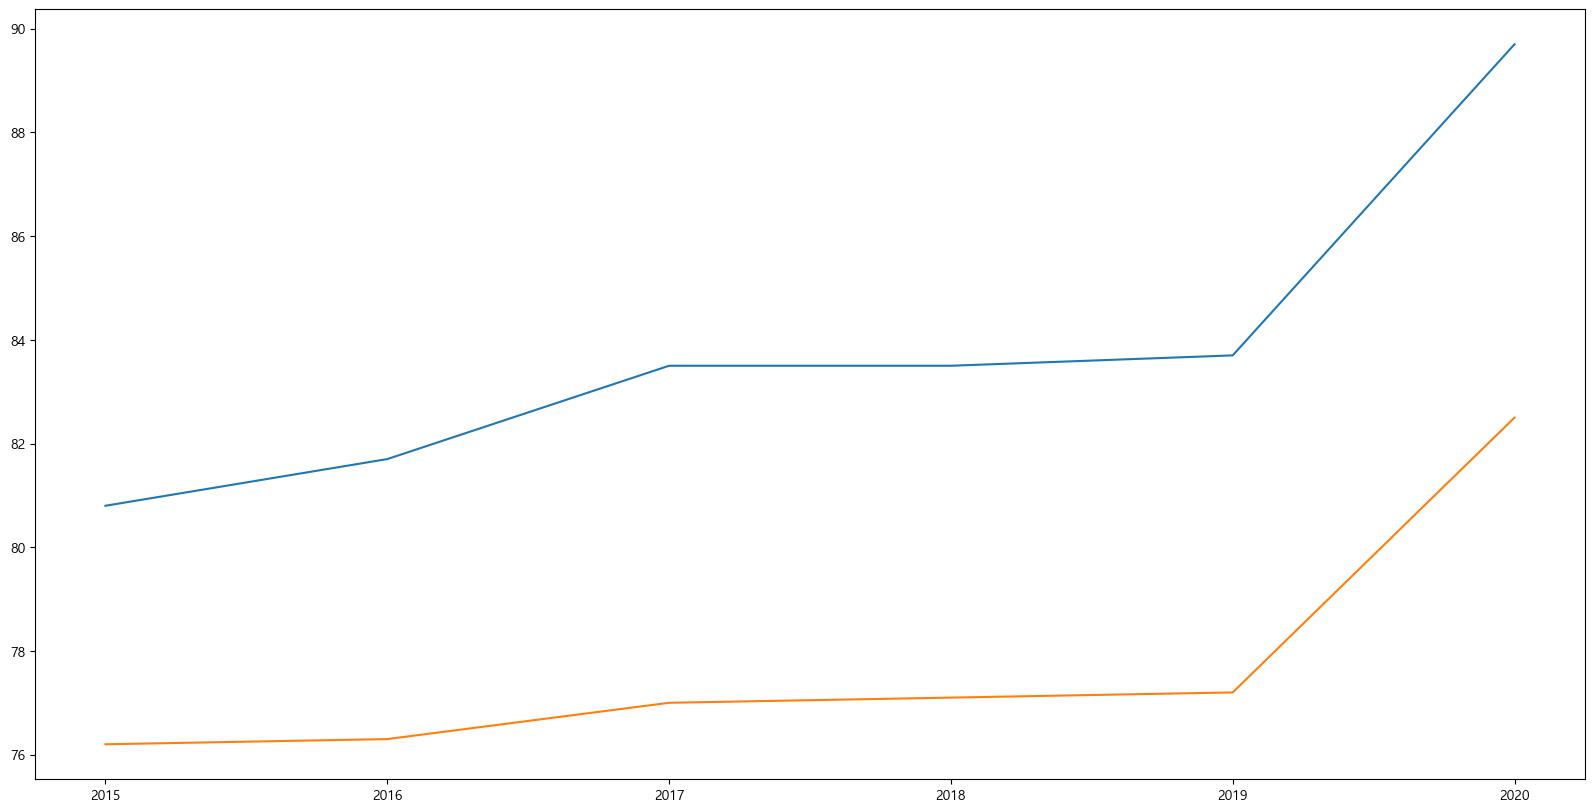

In [248]:
fig = plt.figure(figsize=(20,10))
plt.plot(e_learning_yes['연도'], e_learning_yes['10대'])
plt.plot(e_learning_yes['연도'], e_learning_yes['20대'])

plt.show()

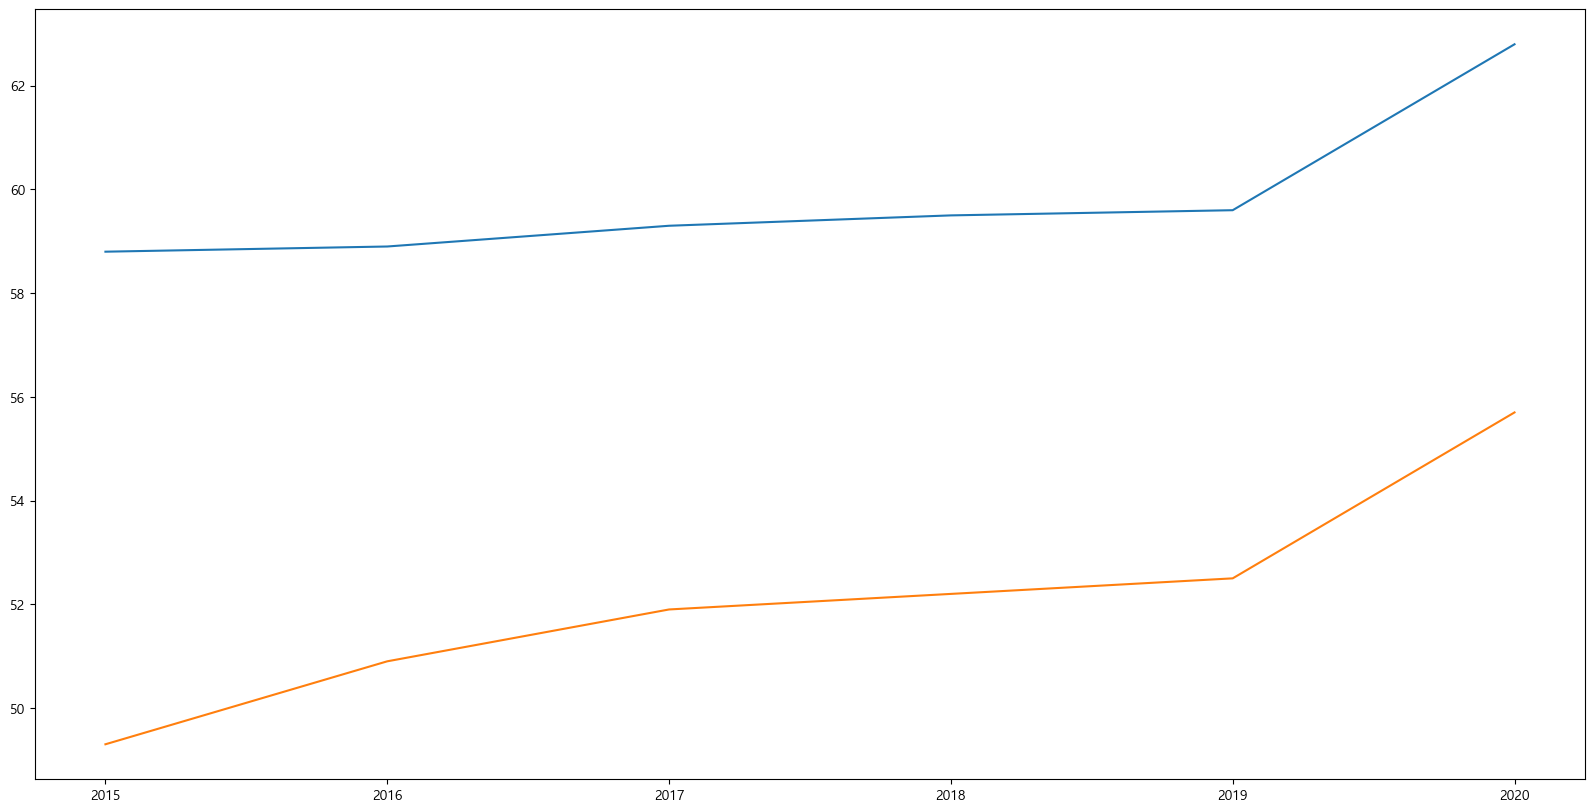

In [267]:
fig = plt.figure(figsize=(20,10))
plt.plot(e_learning_yes['연도'], e_learning_yes['30대'])
plt.plot(e_learning_yes['연도'], e_learning_yes['40대'])

plt.show()

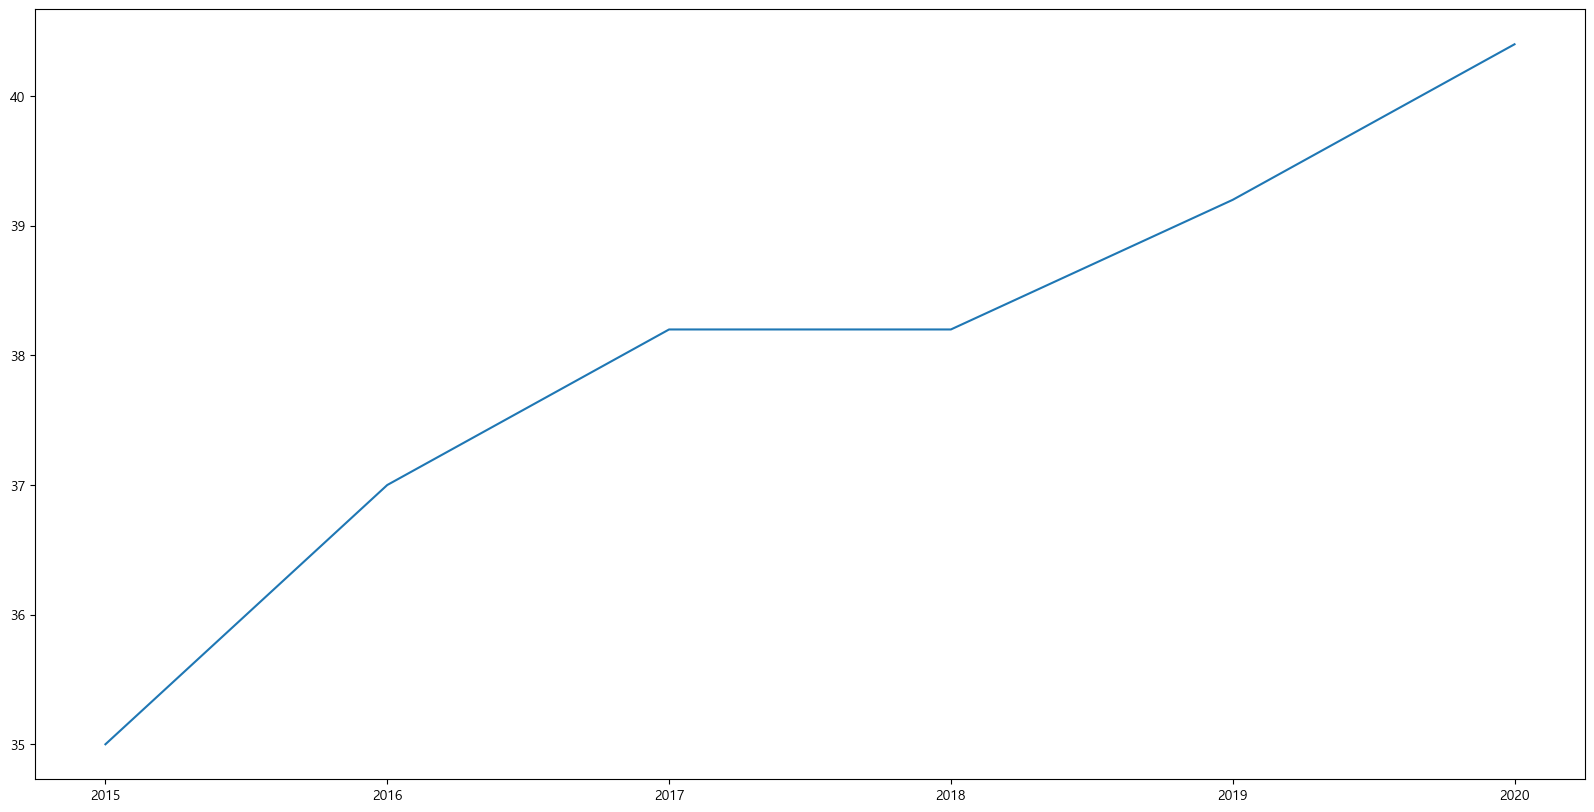

In [269]:
fig = plt.figure(figsize=(20,10))
plt.plot(e_learning_yes['연도'], e_learning_yes['50대'])
plt.show()

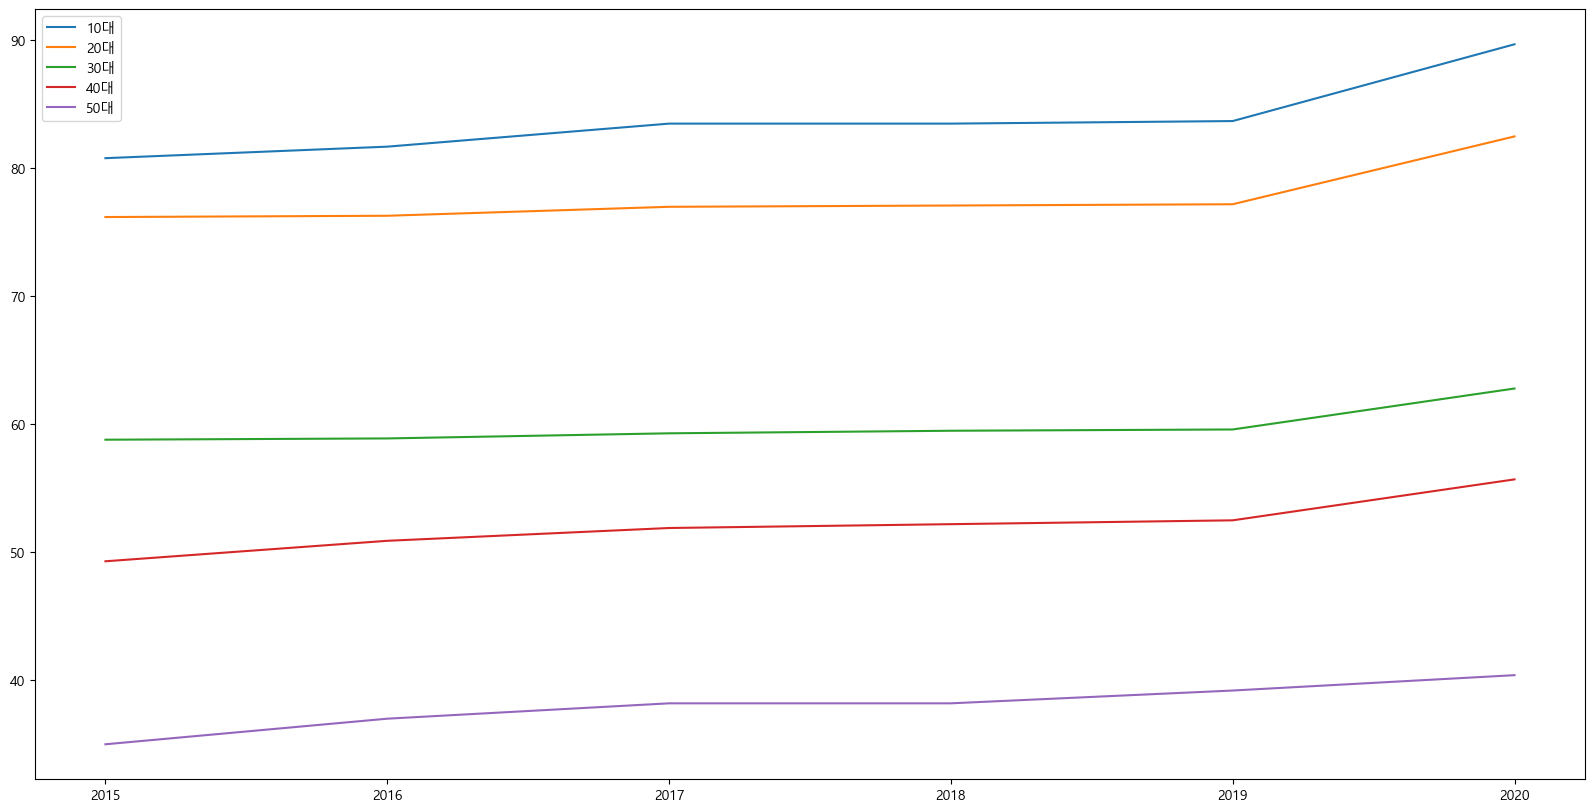

In [264]:
fig = plt.figure(figsize=(20,10))
legend = []
for i in df.columns[3:]:
    plt.plot(e_learning_yes['연도'], e_learning_yes[i])
    legend.append(i)
plt.legend(legend)
plt.show()